<a href="https://colab.research.google.com/github/Kamraaan1/BDA/blob/main/Brand_Value_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'>  MTAT.03.319 - Business Data Analytics
  </font></center></h1>
 <h1><center> <font color='black'> Brand Value Monitoring </font></center></h3>

</div>

## Sentiment analysis:
![sentiment analysis: credits: kdnuggets](https://www.kdnuggets.com/wp-content/uploads/sentiment-hero-480.jpg)<br/>
Sentiment analysis is a term that refers to the use of natural language processing, text analysis, and computational linguistics in order to understand the attitude of a speaker or writer toward a specific topic.<br/>
<br/>
Basically, it helps to determine whether a text is expressing sentiments that are positive, negative, or neutral. Sentiment analysis is an excellent way to discover how people, particularly consumers, feel about a particular topic, product, or idea. The sentiment labels are not bound to only positive, negative, or neutral. In reality, it can be any sentimet the user wants.<br/>
<br/>

### History
The origin of sentiment analysis can be traced to the 1950s, when sentiment analysis was primarily used on written paper documents. Today, however, sentiment analysis is widely used to mine subjective information from content on the Internet, including texts, tweets, blogs, social media, news articles, reviews, and comments. This is done using a variety of different techniques, including NLP, statistics, and machine learning methods. Organizations then use the information mined to identify new opportunities and better target their message toward their target demographics. In recent days we see use of sentiment analysis in politics to predict public response to its policy announcements or even in favouritism in election.<br/>  


### Today's lesson
In this notebook, we are going to explore two different approach for sentiment analysis. In the first one, we will train a machine learning model and in the second one we will use the state-of-the-art pretrained models to predict sentiments that does not require time consuming training. <br/>


### Data Loading

In [ ]:
import pandas as pd
tweet_data = pd.read_csv('InputFileBrandValPred.csv')
print("data shape:",tweet_data.shape)
print("what are columns:",tweet_data.columns)
tweet_data.head()

data shape: (14640, 9)
what are columns: Index(['tweet_id', 'airline_sentiment', 'negativereason', 'airline', 'name',
       'text', 'tweet_coord', 'tweet_created', 'tweet_location'],
      dtype='object')


,tweet_id,airline_sentiment,negativereason,airline,name,text,tweet_coord,tweet_created,tweet_location
0,5.703061e+17,neutral,NaN,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN
1,5.703011e+17,positive,NaN,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN
2,5.703011e+17,neutral,NaN,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play
3,5.703010e+17,negative,Bad Flight,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN
4,5.703008e+17,negative,Can't Tell,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN


### Data Cleaning
Our goal is to detect sentiment from the tweet text. So we will drop all the unnecessary columns from the data as well as clean it a bit.

In [ ]:
original=tweet_data.copy(deep=True)
tweet_data = tweet_data.drop(['tweet_id', 'tweet_coord', 'tweet_created',
                               'tweet_location','name'],axis = 1)
tweet_data.head()

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Bad Flight,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing...


### Data Preprocessing
We will look into each column to inspect the values. After that we will impute those values on reasonable ground. 

In [ ]:
tweet_data['negativereason'].unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [ ]:
tweet_data['negativereason'] = tweet_data['negativereason'].fillna('')
tweet_data['negativereason'].unique()

array(['', 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [ ]:
tweet_data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
tweet_data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

The text column would have various inputs and require some deep preprocessing. We will see that in the following sections. Before that, let's do some exploratory data analysis. 

### Exploratory Data Analysis

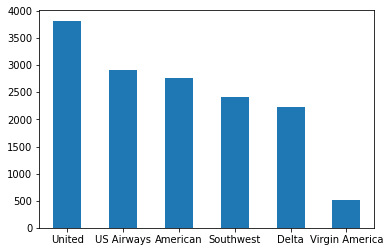

In [ ]:
tweet_data.airline.value_counts().plot.bar(rot=0)

### Market share
Here is a picture of the market share of some of these companies. 
![Market Share](https://static.seekingalpha.com/uploads/2019/5/23/saupload_JbQ580s2uPF9xbGlH2jgJSmcuUVs8DtY_XIHMZ5Mk55vw53sHD-A09kvr9CAqltW5vfmAAIRfOEseqc-0xQoAqJnBEWvDJYkq8eEXPYTfhqEN-RazGROKyNwlt2ExBVKnYZpfr93.jpeg)

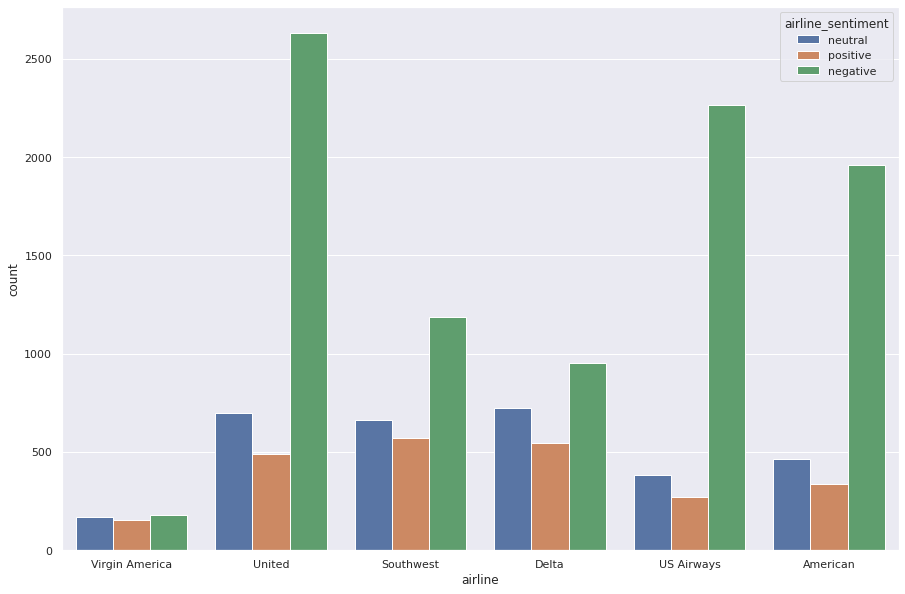

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x='airline', hue="airline_sentiment", data=tweet_data)

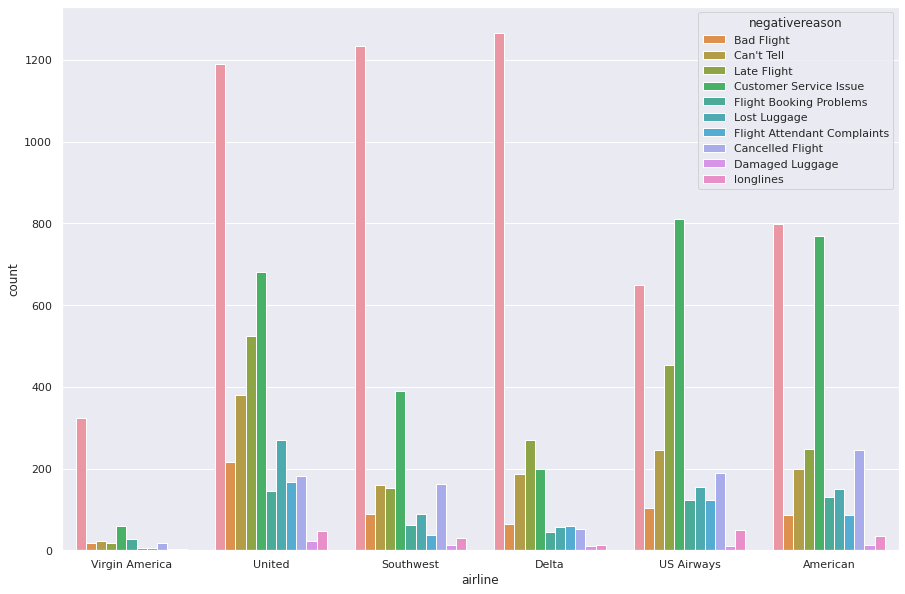

In [ ]:
sns.countplot(x='airline', hue="negativereason", data=tweet_data)

In [ ]:
original['day_week']=pd.to_datetime(original.tweet_created).dt.day_name()
original

,tweet_id,airline_sentiment,negativereason,airline,name,text,tweet_coord,tweet_created,tweet_location,day_week
0,5.703061e+17,neutral,NaN,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Tuesday
1,5.703011e+17,positive,NaN,Virgin America,jnardino,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Tuesday
2,5.703011e+17,neutral,NaN,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Tuesday
3,5.703010e+17,negative,Bad Flight,Virgin America,jnardino,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Tuesday
4,5.703008e+17,negative,Can't Tell,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...
14635,5.695877e+17,positive,NaN,American,KristenReenders,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,Sunday
14636,5.695874e+17,negative,Customer Service Issue,American,itsropes,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,Sunday
14637,5.695872e+17,neutral,NaN,American,sanyabun,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",Sunday
14638,5.695872e+17,negative,Customer Service Issue,American,SraJackson,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Sunday


### For all arilines 


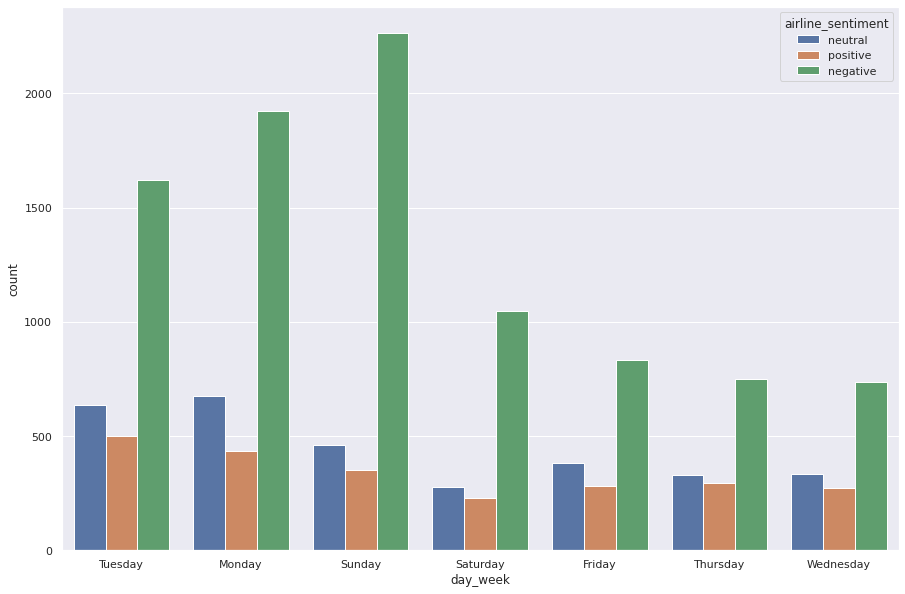

In [ ]:
sns.countplot(x='day_week', hue="airline_sentiment", data=original)

### For virgin atlantic

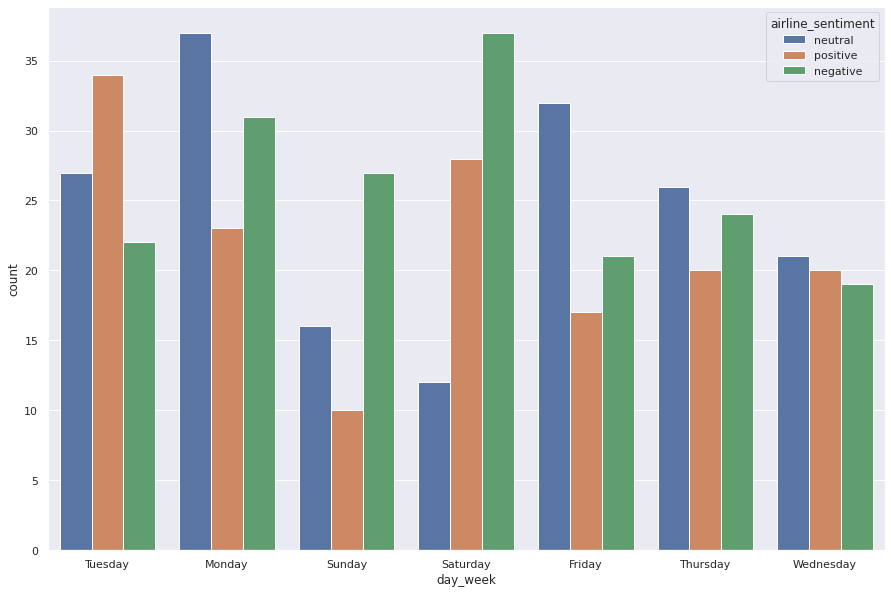

In [ ]:
sns.countplot(x='day_week', hue="airline_sentiment", data=original[original.airline=='Virgin America'])

In [ ]:
tweet_data.text

0                      @VirginAmerica What @dhepburn said.
1        @VirginAmerica plus you've added commercials t...
2        @VirginAmerica I didn't today... Must mean I n...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
                               ...                        
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14637    @AmericanAir Please bring American Airlines to...
14638    @AmericanAir you have my money, you change my ...
14639    @AmericanAir we have 8 ppl so we need 2 know h...
Name: text, Length: 14640, dtype: object

These texts data require some deep processing in order to achieve a better classification result. <br>
But at first let's separate the textual information and labels. 

In [ ]:
X=tweet_data['text']
y=tweet_data['airline_sentiment']

print("Texts: ")
print(X.head())
print("Labels: ")
print(y.head())

Texts: 
0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object
Labels: 
0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object


We will use NLTK library for text preprocessing. You can try manually preprocess the data using [regex](https://www.w3schools.com/python/python_regex.asp). But using NLTK just makes our life a bit easier.

[**What is stopwords?**](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html) <br>
[**What is PorterStemmer?**](hhttps://www.nltk.org/howto/stem.html)

In [ ]:
tweet_data.airline.unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
import nltk
from nltk.corpus import stopwords

#downloading common english stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
import string


stop_words=stopwords.words('english')

#lower-casing the letters
airlines_low = [item.lower() for item in tweet_data.airline.unique()]

#removing spaces between the words
airlines_low_nowhitespace = [x.replace(" ", "") for x in airlines_low] # 'Virgin America' --> 'VirginAmerica'

#concatenating our custom stopwords list
stop_words=stop_words+airlines_low+airlines_low_nowhitespace

#getting list of punctuation from string package
punct=string.punctuation
stemmer=PorterStemmer()

import re
cleaned_data=[]
for i in range(len(X)):
   #making sure the sentences start with letters from a-z and A-Z or removing single characters from the start
   tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])

   #lowercasing
   tweet=tweet.lower().split()
   #removing stop words and punctuations
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
   #concatenating the tweet again to a sentence
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)

cleaned_data[0:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dhepburn said',
 'plu ad commerci experi tacki',
 'today must mean need take anoth trip',
 'realli aggress blast obnoxi entertain guest face amp littl recours',
 'realli big bad thing']

#### Wordcloud
One easy way to understand sentiment or the words used at the highest frequency is through wordcloud. It just orders the words with the frequency of their occurance and then makes visual representation. 


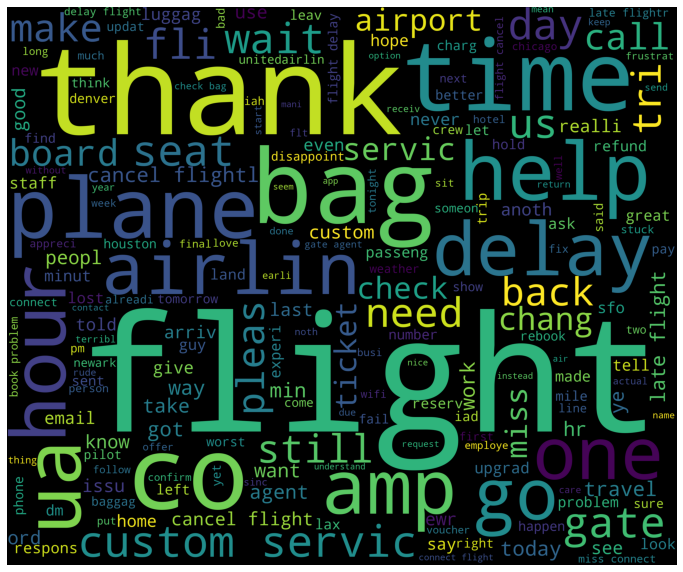

In [ ]:
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

new_df=tweet_data[tweet_data['airline']=='United']

new_df=new_df.text
united_sent=[]
for i in range(len(new_df)):
   #making sure the sentences start with letters from a-z and A-Z or removing single characters from the start
   tweet=re.sub('[^a-zA-Z]',' ',new_df.iloc[i])

   #lowercasing
   tweet=tweet.lower().split()
   #removing stop words and punctuations
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words) and (word not in punct)]
   #concatenating the tweet again to a sentence
   tweet=' '.join(tweet)
   united_sent.append(tweet)

cleaned_word = " ".join([word for word in united_sent])

wordcloud = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


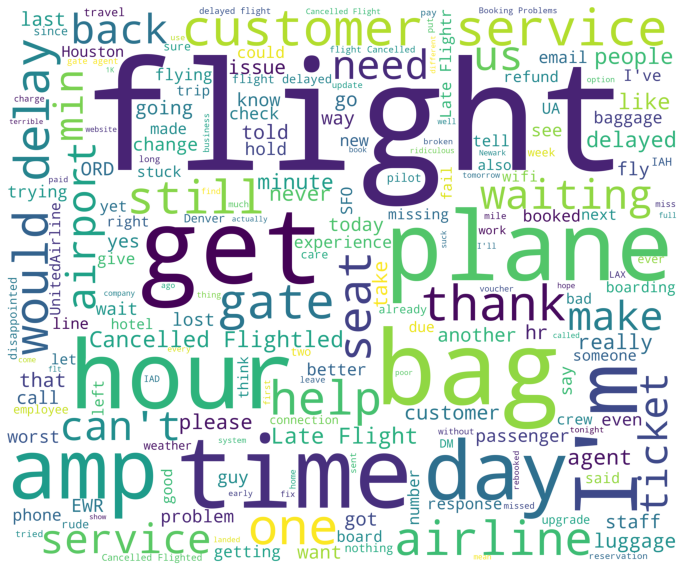

In [ ]:
new_df=tweet_data[tweet_data['airline']=='United']
new_df=new_df[new_df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

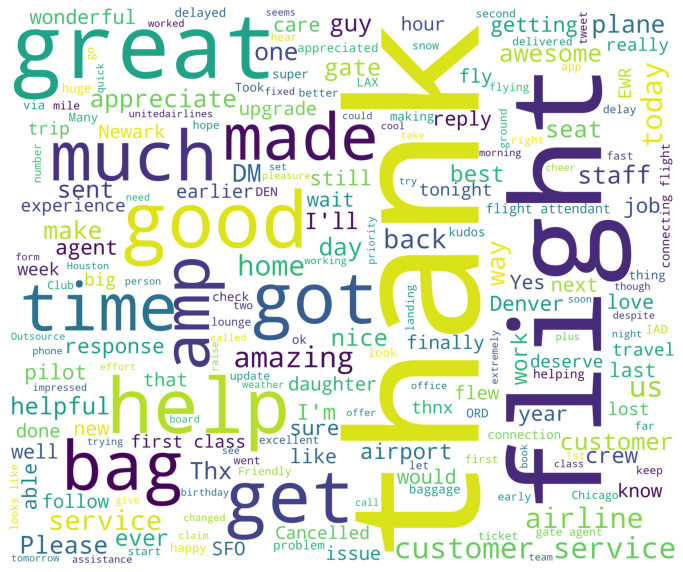

In [ ]:
import matplotlib.pyplot as plt
new_df=tweet_data[tweet_data['airline']=='United']
new_df=new_df[new_df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now the actual training can be performed given our training data is ready. Notice one thing, we are using a list of string here unlike earlier times where we input a tabular data. Which means our data has to be converted into tabular form. But how? 

In the following section we will learn and apply some techniques to represent our textual data numerically and create a tabular data after that use that data to train the models. 

### Training a ML model
Machine learning and deep learning work well with numerical data. However, natural language (human languages) consists of words and sentences. Therefore, before we can build and train a sentiment analysis model, we need to convert text to numbers. Several approaches have been developed for converting text to numbers. Bag of Words, N-grams, and Word2Vec model are some of them.

In this lab, we will use the Bag of Words approach with TF-IDF scheme in order to convert text to numbers. Python’s Sklearn library comes with built-in functionalities to implement TF-IDF approach which you will see later. Here we will provide a brief insight into the TF-IDF approach.

#### Bag of Words
In the bag of words approach, the vocabulary of all the unique words in all the documents is formed. This vocabulary serves as a feature vector. Suppose you have three documents in our corpus S1, S2, and S3:

- S1 = “It is cold outside” <br>
- S2= “The weather is cold” <br>
- S3 = “I am outside” <br>

The vocabulary formed using the above three sentences will be: <br>

[it, is, cold, outside, the, weather, I,  am] <br>

This vocabulary of words will be used to create feature vectors from the sentence. Let’s see how it is done. The feature vector for S1 will be: <br>

S1= [1, 1, 1, 1, 0, 0, 0, 0]

Basically, the feature vector is created by finding if the word in the vocabulary is also found in the sentence. If a word is found in vocabulary as well as in the sentence, a one is entered in that place, else a zero will be entered. So, for S1, the first four words in the vocabulary were present in the sentence S1, you have four ones in the beginning and then four zeros.

Similarly, the feature vectors for S2 and S3 will be:

S2 = [0, 1, 1, 0, 1, 1, 0 , 0]

S3 = [0, 0, 0, 1, 0, 0, 1, 1]


#### TF-IDF
Now you know how bag of words approach work. Let’s now see how TF-IDF is related to bag of words.

In a simple bag of words, every word is given equal importance. The idea behind TF-IDF is that the words that occur more frequently in one document and less frequently in other documents should be given more importance as they are more useful for classification.

TF-IDF is a product of two terms: TF and IDF.

**Term Frequency (TF)** is equal to the number of times a word occurs in a specific document. It is calculated as:

$TF  = \frac{Frequency\ of\ a\ word\ in\ the\ document}{Total\ words\ in\ the\ document}$

**Inverse Document Frequency (IDF)** for a specific word is equal to the total number of documents, divided by the number of documents that contain that specific word. The log of the whole term is calculated to reduce the impact of the division. It is calculated as:

$IDF = Log(\frac{Total\ number\ of\ docs}{Number\ of\ docs\ containing\ the\ word})$

For instance, in S1, the TF for the word “outside” will 1/4 = 0.25. Similarly, the IDF for the word “outside” in S1 will be Log(3/2) = 0.176. The TF-IDF value will be 0.25 x 0.176 = 0.044.

These are complex calculations. Fortunately, you do not have to do all these calculations. The TfidfVectorizer  class from the   sklearn.feature_extraction.text module can be used to create feature vectors containing TF-IDF values. Look at the following script:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stop_words)  
X = tfidfconverter.fit_transform(cleaned_data).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airways', 'america', 'us', 'virgin'] not in stop_words.
  % sorted(inconsistent)


Let's see how the data looks

In [ ]:
pd.DataFrame(X, columns = tfidfconverter.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aadvantag,abc,abil,abl,abq,absolut,absurd,abt,abysm,...,yet,yo,york,young,yr,yup,yvr,yyz,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we are ready to train an ML model. But before, we have to split the data into traina nd test set. 

In [ ]:
#Split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### SVC (Support Vector Classification, one application of support vector machine)

In [ ]:
from sklearn.svm import SVC
text_classifier = SVC()
text_classifier.fit(X_train, y_train)
 
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1870
     neutral       0.68      0.47      0.55       614
    positive       0.79      0.61      0.69       444

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.79      0.78      2928

0.789275956284153


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
 
 
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))


[[1699  128   43]
 [ 285  285   44]
 [ 144   58  242]]
              precision    recall  f1-score   support

    negative       0.80      0.91      0.85      1870
     neutral       0.61      0.46      0.53       614
    positive       0.74      0.55      0.63       444

    accuracy                           0.76      2928
   macro avg       0.71      0.64      0.67      2928
weighted avg       0.75      0.76      0.75      2928

0.7602459016393442


Upto now we have been exploring traditional ML methods that require training. Just one SVM required quite long training. In real life our datasets are much bigger and require longer training and the time complexity gets even higher when we consider hyperparameter tuning. In recent days, we use pretrained models where there is no need for training. In general there are models that are pre-trained on large corpus and later can be fine-tuned on specific tasks. And those fine-tuned models are distributed again to reduce training for other people. 

For our next task, we will use one such pretrained model to make our tasks way easier. Huggingface is one such open source library that distributes various pretrained models. And using their api sentiment analysis can be done in three lines of codes. 

## Huggingface: Transformer based sentiment analysis
In this section we will do sentiment analysis using pretrained huggingface transformer models. We will also measure their performances and comment on it.<br/>
- [different sentiment models in huggingface](https://huggingface.co/models?search=sentim)<br/>
- [huggingface quicktour](https://huggingface.co/transformers/quicktour.html)<br/>
- [possible bug to look for](https://github.com/huggingface/transformers/issues/4263)<br/>

More question! <br>
[What is transformer?](https://medium.com/inside-machine-learning/what-is-a-transformer-d07dd1fbec04)<br>
This is a bit advanced. However, if any of you are interested, can have a look. 
Ideally, at first you should know how machine learning works, then how neural network works, more specifically how RNN (LSTM) works and then you should dive into Transformers. 

In the follwoing cell we will see how easy it is to detect emotion/ sentiment using transformers which is available through the library transformers. 

In [ ]:
!pip3 install transformers

#if does not install follow 
#https://huggingface.co/transformers/installation.html

     |████████████████████████████████| 4.0 MB 30.6 MB/s 
     |████████████████████████████████| 6.6 MB 53.3 MB/s 
     |████████████████████████████████| 77 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 59.6 MB/s 
     |████████████████████████████████| 895 kB 19.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')
classifier("I am so happy to use huggingface today!")[0]['label']

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

'POSITIVE'

In [ ]:
classifier("it was a extremely bad movie!")[0]['label']

'NEGATIVE'

In [ ]:
classifier("it is a statement")[0]['label']

'POSITIVE'

In [ ]:
tweet_data['bert_based_sentiment'] = tweet_data['text'].apply(lambda x: classifier(x)[0]['label'].lower())


In [ ]:
from sklearn.metrics import classification_report as crep

tweet_data_cut = tweet_data[tweet_data['airline_sentiment']!='neutral']
print(crep(tweet_data_cut['airline_sentiment'],tweet_data_cut['bert_based_sentiment']))

              precision    recall  f1-score   support

    negative       0.96      0.90      0.93      9178
    positive       0.69      0.85      0.76      2363

    accuracy                           0.89     11541
   macro avg       0.82      0.87      0.84     11541
weighted avg       0.90      0.89      0.89     11541



## LDA (Latent Dirichlet Allocation)

Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:
Dimensionality Reduction, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}

Unsupervised Learning, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight
Tagging, abstract “topics” that occur in a collection of documents that best represents the information in them.

There are several existing algorithms you can use to perform the topic modeling. The most common of it are, Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = tweet_data.text.values.tolist()
data_words = list(sent_to_words(data))

#print(list(sent_to_words(data)))
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/hasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['dhepburn', 'said']


In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

print(id2word.token2id)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

{'dhepburn': 0, 'said': 1, 'added': 2, 'commercials': 3, 'experience': 4, 'plus': 5, 'tacky': 6, 'another': 7, 'mean': 8, 'must': 9, 'need': 10, 'take': 11, 'today': 12, 'trip': 13, 'aggressive': 14, 'amp': 15, 'blast': 16, 'entertainment': 17, 'faces': 18, 'guests': 19, 'little': 20, 'obnoxious': 21, 'really': 22, 'recourse': 23, 'bad': 24, 'big': 25, 'thing': 26, 'flight': 27, 'flying': 28, 'pay': 29, 'playing': 30, 'seats': 31, 'seriously': 32, 'va': 33, 'would': 34, 'away': 35, 'ear': 36, 'every': 37, 'fly': 38, 'go': 39, 'nearly': 40, 'time': 41, 'vx': 42, 'worm': 43, 'yes': 44, 'co': 45, 'grezp': 46, 'hats': 47, 'https': 48, 'men': 49, 'missed': 50, 'mwpg': 51, 'opportunity': 52, 'parody': 53, 'prime': 54, 'without': 55, 'well': 56, 'amazing': 57, 'arrived': 58, 'early': 59, 'good': 60, 'hour': 61, 'among': 62, 'cause': 63, 'death': 64, 'know': 65, 'leading': 66, 'second': 67, 'suicide': 68, 'teens': 69, 'better': 70, 'graphics': 71, 'iconography': 72, 'lt': 73, 'minimal': 74, 'm

In [ ]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"flight" + 0.020*"jetblue" + 0.014*"co" + 0.014*"http" + '
  '0.012*"americanair" + 0.009*"get" + 0.008*"aa" + 0.007*"bag" + '
  '0.007*"thanks" + 0.006*"southwestair"'),
 (1,
  '0.043*"flight" + 0.035*"americanair" + 0.017*"jetblue" + '
  '0.016*"southwestair" + 0.012*"co" + 0.012*"http" + 0.010*"get" + '
  '0.010*"service" + 0.009*"late" + 0.007*"help"'),
 (2,
  '0.020*"flight" + 0.018*"americanair" + 0.016*"get" + 0.010*"jetblue" + '
  '0.008*"bag" + 0.008*"southwestair" + 0.008*"time" + 0.007*"hours" + '
  '0.006*"never" + 0.006*"gate"'),
 (3,
  '0.019*"get" + 0.019*"southwestair" + 0.012*"need" + 0.012*"americanair" + '
  '0.011*"flight" + 0.009*"jetblue" + 0.009*"time" + 0.008*"back" + '
  '0.006*"still" + 0.006*"help"'),
 (4,
  '0.036*"americanair" + 0.026*"flight" + 0.026*"southwestair" + 0.016*"thank" '
  '+ 0.015*"co" + 0.014*"http" + 0.012*"thanks" + 0.010*"dm" + 0.009*"us" + '
  '0.008*"get"'),
 (5,
  '0.025*"jetblue" + 0.017*"flight" + 0.016*"americanair" + 0

In [ ]:
#!pip3 install pyLDAvis
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/home/hasan/Documents/UT/Masters/Teaching/BDA/HW5'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, '/home/hasan/Documents/UT/Masters/Teaching/BDA/HW5'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.086414  0.036441       1        1  14.655288
9      0.070853  0.010184       2        1  12.567692
1      0.012048  0.016229       3        1  11.742827
7     -0.033602  0.003693       4        1  10.512172
5     -0.016951 -0.020620       5        1   9.411962
4      0.003705  0.024753       6        1   9.222277
0     -0.048948  0.023139       7        1   8.613540
8      0.021479 -0.110061       8        1   8.526956
3     -0.049717  0.034095       9        1   7.550691
2     -0.045281 -0.017854      10        1   7.196595, topic_info=             Term         Freq        Total Category  logprob  loglift
1267  americanair  5196.000000  5196.000000  Default  30.0000  30.0000
439       jetblue  1714.000000  1714.000000  Default  29.0000  29.0000
27         flight  3646.000000  3646.000000  Default  28.0000  28.0000
453     cancelled  1094.000000  1094.000000  Default  27.0000  27.0000
2556           aa   481.000000   481.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
118          help    41.465215   865.157055  Topic10  -5.4782  -0.4065
480          back    37.933287   539.658572  Topic10  -5.5672  -0.0235
95         thanks    37.197772  1003.413890  Topic10  -5.5868  -0.6634
774       airport    34.063676   337.461989  Topic10  -5.6748   0.3383
45             co    34.335495  1008.524844  Topic10  -5.6669  -0.7485

[856 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2556      1  0.373806     aa
2556      2  0.280354     aa
2556      3  0.012460     aa
2556      4  0.101758     aa
2556      5  0.008307     aa
...     ...       ...    ...
86        8  0.006398    yet
86        9  0.134353    yet
86       10  0.198330    yet
7051      8  0.872202  youve
4771      9  0.800512   yuck

[2620 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 2, 8, 6, 5, 1, 9, 4, 3])